# 

In [1]:
include("../src/SpinonStructure.jl")
include("../src/BZMath.jl")


using .BZmath
using .SpinonStructure
using StaticArrays
using SparseArrays
using LinearAlgebra
using BenchmarkTools
using Plots

In [2]:



function reciprocal_basis(M::Matrix{Float64})
    return inv(M').*2π
end




f(x) = sin(4+x[1] )^2*sin(x[2])^2 + cos(3*(x[3]-x[3]))^2
f2(x) = sin(4+x[1] )^2*sin(x[2])^2 + cos(3*(x[1]-x[2]))^2
g(x) = -(x[1]^2 + x[2]^2 + x[3]^2)  + (x[1]^4 + x[2]^4 + x[3]^4 )
h(x) = exp(-norm2(x -[1.,1.,1.])/(2*0.3)) #- exp(-norm2(x -[-1.,1.,1.])/(2*0.3))



h (generic function with 1 method)

In [36]:
sim_0flux_111 = SimulationParameters("0flux_111",
    lattice=geom.PyroPrimitive(1,1,1),
    A=zeros(1,4),
    Jpm=-0.01,
    B=[0.,0.,0.],
    n_samples=10000
    )

sim_0flux_123 = SimulationParameters("0flux_123",
    lattice=geom.PyroPrimitive(1,2,3),
    A=zeros(1*2*3,4),
    Jpm=-0.01,
    B=[0.,0.,0.],
    n_samples=10000
    )

sim_0flux_211 = SimulationParameters("0flux_211",
    lattice=geom.PyroPrimitive(2,1,1),
    A=zeros(2,4),
    Jpm=-0.01,
    B=[0.,0.,0.],
    n_samples=10000
    )

sim_0flux_311 = SimulationParameters("0flux_311",
    lattice=geom.PyroPrimitive(3,1,1),
    A=zeros(3,4),
    Jpm=-0.01,
    B=[0.,0.,0.],
    n_samples=10000
    )



SimulationParameters([0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0], -0.01, [0.0, 0.0, 0.0], Main.SpinonStructure.PyrochloreGeometry.PyroPrimitive([3, 1, 1], SVector{3, Int64}[[0, 0, 0], [0, 4, 4], [0, 8, 8], [2, 2, 2], [2, 6, 6], [2, 10, 10]], SVector{3, Int64}[[1, 1, 1], [1, -1, -1], [-1, 1, -1], [-1, -1, 1], [1, 5, 5], [1, 3, 3], [-1, 5, 3], [-1, 3, 5], [1, 9, 9], [1, 7, 7], [-1, 9, 7], [-1, 7, 9]]), 2.0, 10000, "0flux_311")

In [42]:
csim_0flux_111 = CompiledModel(sim_0flux_111,0.2);
csim_0flux_123 = CompiledModel(sim_0flux_123,0.2);
csim_0flux_211 = CompiledModel(sim_0flux_211,0.2);
csim_0flux_311 = CompiledModel(sim_0flux_311,0.2);

# Consistency checks:
1. H is invariant under BZ translations
2. G is invariant under BZ translations
3. Integrand as a whole is invariant under RLV translations

In [52]:
# invariance of H under BZ translations
Q0 = @SVector [0.,0,0]
# Q0 = @SVector rand(3)

s = csim_0flux_311

B1 = geom.reciprocal_basis(s.sim.lat)

H0 = SpinonStructure.calc_hopping(s, Q0)
for _=1:10
    I = rand(Int64, 3).% 121
    H1 = SpinonStructure.calc_hopping(s, Q0+B1*I)
    if norm(H1 - H0) > 1e-10
        println("ERROR! $(I)")
    end
end

ERROR! [-11, 120, 0]
ERROR! [29, 70, 40]
ERROR! [68, 9, 43]


In [64]:
H1 = SpinonStructure.calc_hopping(s, Q0+B1*[1,0,0])
norm.(H1- H0)

6×6 SparseMatrixCSC{Float64, Int64} with 12 stored entries:
  ⋅         0.0129904  0.0129904   ⋅          ⋅          ⋅ 
 0.0129904   ⋅         0.0129904   ⋅          ⋅          ⋅ 
 0.0129904  0.0129904   ⋅          ⋅          ⋅          ⋅ 
  ⋅          ⋅          ⋅          ⋅         0.0129904  0.0129904
  ⋅          ⋅          ⋅         0.0129904   ⋅         0.0129904
  ⋅          ⋅          ⋅         0.0129904  0.0129904   ⋅ 

In [65]:
eigen(Matrix(H0))


Eigen{ComplexF64, Float64, Matrix{ComplexF64}, Vector{Float64}}
values:
6-element Vector{Float64}:
 -0.029999999999999964
 -0.029999999999999964
 -0.0075
 -0.0075
 -0.0074999999999999945
 -0.0074999999999999945
vectors:
6×6 Matrix{ComplexF64}:
 -0.57735+0.0im       0.0+0.0im  …  0.00862013+0.0im         0.0+0.0im
 -0.57735+0.0im       0.0+0.0im      -0.711377+0.0im         0.0+0.0im
 -0.57735-0.0im       0.0+0.0im       0.702757+0.0im         0.0+0.0im
      0.0+0.0im  -0.57735+0.0im            0.0+0.0im  0.00862013+0.0im
      0.0+0.0im  -0.57735+0.0im            0.0+0.0im   -0.711377+0.0im
      0.0+0.0im  -0.57735-0.0im  …         0.0+0.0im    0.702757+0.0im

In [66]:
eigen(Matrix(H1))

Eigen{ComplexF64, Float64, Matrix{ComplexF64}, Vector{Float64}}
values:
6-element Vector{Float64}:
 -0.029999999999999957
 -0.02999999999999995
 -0.007499999999999999
 -0.007499999999999999
 -0.007499999999999992
 -0.007499999999999992
vectors:
6×6 Matrix{ComplexF64}:
 -0.288675-0.5im        0.0+0.0im  …       0.0+0.0im
 -0.288675+0.5im        0.0+0.0im          0.0+0.0im
   0.57735-0.0im        0.0+0.0im          0.0+0.0im
       0.0+0.0im  -0.288675-0.5im     -0.13302+0.0627311im
       0.0+0.0im  -0.288675+0.5im     0.221953-0.677561im
       0.0+0.0im    0.57735-0.0im  …  0.685579+0.0im

In [85]:
"""
lattice_vectors(lat::PyroPrimitive)
Returns as 3x3 matrix of the basis vectors, stored as columns
"""
function lattice_vectors(lat::geom.PyroPrimitive)
    return lat.L' .* geom.primitive_basis 
end


function wrap_BZ(lat::geom.PyroPrimitive, Q)
    B = geom.reciprocal_basis(lat)
    Binv = lattice_vectors(lat)'/(2π)
    return B * mod.(Binv * Q, 1)
end



wrap_BZ (generic function with 2 methods)

In [178]:
lat311 = geom.PyroPrimitive(3,1,1)
wrap_BZ(lat311, SVector{3,Float64}([1,1,1]))
B = geom.reciprocal_basis(lat311)

3×3 SMatrix{3, 3, Float64, 9} with indices SOneTo(3)×SOneTo(3):
 -0.261799   0.785398   0.785398
  0.261799  -0.785398   0.785398
  0.261799   0.785398  -0.785398

In [186]:
X =reduce(hcat, [wrap_BZ(lat311, (rand(3).-0.5)*100π/8 ) for _ =1:1000])

3×1000 Matrix{Float64}:
  0.345811   0.854819   0.929535  …   0.513418   0.688599    0.80651
  0.327432   0.458253   0.604614     -0.210238  -0.0446442   0.504174
 -0.141089  -0.274458  -0.465968      0.395275   0.0831126  -0.446949

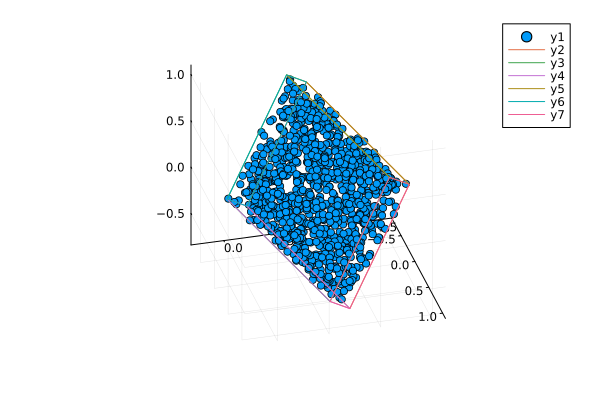

In [193]:
scatter(eachrow(X)...,camera=(15,-30))
z = zeros(3)
face1 = reduce(hcat, [z,B[:,3], B[:,3] + B[:,2], B[:,2], z])
face2 = reduce(hcat, [z,B[:,1], B[:,1] + B[:,3], B[:,3], z])
face3 = reduce(hcat, [z,B[:,1], B[:,1] + B[:,2], B[:,2], z])
plot!(eachrow(face1)...)
plot!(eachrow(face1.+B[:,1])...)
plot!(eachrow(face2)...)
plot!(eachrow(face2.+B[:,2])...)
plot!(eachrow(face3)...)
plot!(eachrow(face3.+B[:,3])...)


In [ ]:
# Square lattice test

H11(k) = -2*cos(k[1]) - 2*cos(k[2])
H21(k) = [ -2*cos(k[1]) -2*cos(k[2]); -2*cos(k[2]) -2*cos(k[1]) ]

plot3d
